<a href="https://colab.research.google.com/github/alkagam/Programaci-n-y-an-lisis-estad-stico/blob/master/Proyecto_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Proyecto final

En este proyecto estudiarás un conjunto de datos con muestras de
vino tinto del norte de Portugal. El objetivo es modelar la calidad del
vino en base a pruebas fisicoquímicas de la Calidad del Vino Rojo
Portugués, el cual te proporcionaremos. Para ello será importante el
analizar los datos, descubrir los patrones, probar hipótesis y realizar
una regresión lineal para predecir la calidad del vino, así como su
verificación.
El objetivo es Modelar la calidad del vino tinto mediante una
regresión lineal, planteamiento de hipótesis , así como el
análisis exploratorio de los datos a través de diferentes técnicas
estadísticas.
Conocimientos a utilizar:
Estadística descriptiva, análisis exploratorio mediante
visualizaciones y estadísticos, pruebas de hipótesis y regresión
lineal en un Google Colab con código python.
herramientas a utilizar:

Avance 1: Exploración y visualización de datos
Para este avance de proyecto debes descargar la base de datos
WineQuality_Red.csv que está contenida en la parte de los adjuntos
del curso. Esta base de datos contiene información de evaluaciones
de la calidad del vino y otras variables fisicoquímicas. Las variables
dentro de la base de datos son:

Paso 1: Importar la base de datos en formato csv, guardarlo como
un dataframe y visualizar los primeros 4 renglones de la base para
darte una idea de los componentes de esta. Además de obtener la
información del tipo de variables que contiene el dataframe pues te
será de mucha ayuda para conocer el tipo de gráfico que le conviene
más a cada una.


In [32]:
#Implemntar Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
df = pd.read_csv('WineQuality_Red.csv')

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


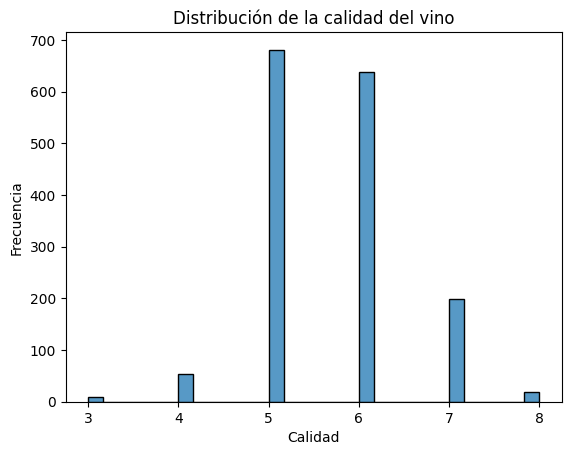

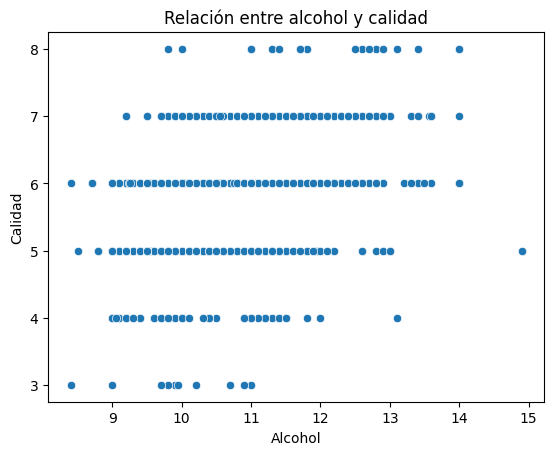

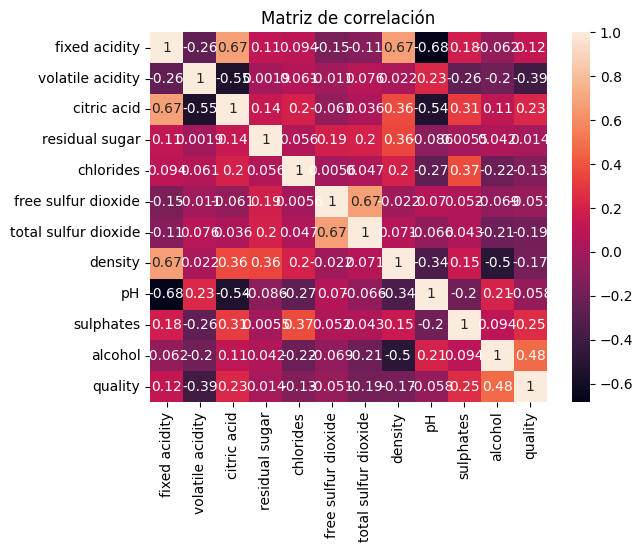

In [34]:
# Histograma de la variable 'quality'
sns.histplot(df['quality'])
plt.title('Distribución de la calidad del vino')
plt.xlabel('Calidad')
plt.ylabel('Frecuencia')
plt.show()

# Diagrama de dispersión entre 'alcohol' y 'quality'
sns.scatterplot(x='alcohol', y='quality', data=df)
plt.title('Relación entre alcohol y calidad')
plt.xlabel('Alcohol')
plt.ylabel('Calidad')
plt.show()

# Matriz de correlación
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.title('Matriz de correlación')
plt.show()

Paso 2.0:

Realizar un análisis descriptivo de la base de datos. Encontrar para
todas las variables: promedio, desviación estándar, mediana y percentil 75%.

In [35]:
# Estadísticas descriptivas básicas
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Paso 2.1:

Realizar un análisis descriptivo de la base de datos. Calcular la
moda para todas las variables.

In [36]:
# Calculando la moda para todas las columnas
df.mode()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.2,0.6,0.0,2.0,0.08,6.0,28.0,0.9972,3.3,0.6,9.5,5


Avance 2:

Pruebas de Hipótesis y Probabilidades.
En este segundo avance de tu proyecto consiste en verificar mediante
un test de normalidad la distribución de una variable estableciendo de
manera correcta la hipótesis nula y la hipótesis alternativa. Además,
calcularás la probabilidad de obtener una calificación específica en la
base de datos usando una tabla normal estándar (z).

Paso 1:
En el avance anterior realizaste un histograma para cada una de las
variables. ¿A partir de esta qué forma notaste que tiene la variable ph?
Ahora se confirma si los datos extraídos para la variable de pH para
la muestra de Calidad del Vino Tinto provienen de una distribución
normal, esto mediante el test de Normalidad Shapiro-Wilk. Esto bajo
un nivel de significancia alfa del 0.05 y supón que las observaciones de
cada muestra son independientes e idénticamente distribuidas.
1. Establece la hipótesis nula y la alternativa.

2. ¿Cuál es el valor del test estadístico? (valor
entre 0 y 1).

3. ¿Cuál es el valor del p-value para esta
prueba bajo tu hipótesis? Imprime tu
resultado con 6 dígitos de exactitud para
que veas lo que sucede (print(‘p=%.6f’ %
(p)) )

4. Explica si rechazas o aceptas la hipótesis
nula H0 al nivel de significancia alpha =0.05. ¿Qué concluyes sobre la hipótesis?

5. De manera práctica, ¿cómo podrías
verificar si la distribución del pH sigue una
distribución normal? ¿Podrías decir que sí
proviene de una distribución normal?

Paso 1: Test de Normalidad Shapiro-Wilk para la variable pH

1. Hipótesis:

    Hipótesis nula (H0): Los datos de pH siguen una distribución normal.
    
    Hipótesis alternativa (H1): Los datos de pH no siguen una distribución normal.

2. Valor del estadístico de prueba:

In [37]:
from scipy.stats import shapiro

# Suponiendo que 'df' es tu DataFrame y 'pH' es la columna
stat, p = shapiro(df['pH'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

# Imprimir el p-value con 6 dígitos
print('p=%.6f' % (p))

Statistics=0.993, p=0.000
p=0.000002


3. Valor p:

In [38]:
print('p=%.6f' % p)

p=0.000002


4. Decisión:

    Si el valor p es menor que el nivel de significancia (0.05), rechazamos la hipótesis nula. Esto significa que hay evidencia suficiente para concluir que los datos de pH no siguen una distribución normal.

    Si el valor p es mayor o igual que el nivel de significancia, no rechazamos la hipótesis nula. Esto significa que no hay evidencia suficiente para concluir que los datos de pH no siguen una distribución normal.

5. Verificación visual:

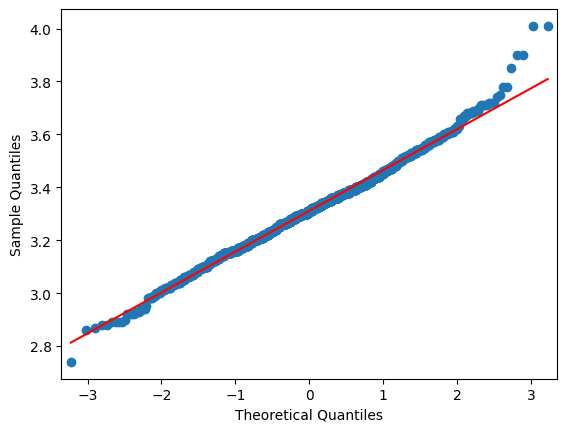

In [39]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

sm.qqplot(df['pH'], line='s')
plt.show()

Paso 2:
Estandariza la variable alcohol y dibuja su histograma con 20 bins.

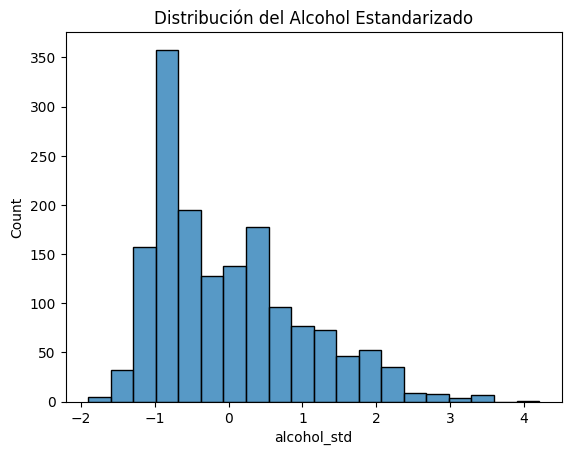

In [40]:
from scipy import stats

# Estandarizar la variable alcohol
df['alcohol_std'] = stats.zscore(df['alcohol'])

# Histograma con 20 bins
sns.histplot(data=df, x="alcohol_std", bins=20)
plt.title("Distribución del Alcohol Estandarizado")
plt.show()

Paso 3:
Obtener la probabilidad de obtener un nivel de alcohol menor a 10 en la
base de datos de la Calidad del Vino Tinto. Esta probabilidad la puedes
obtener mediante el uso de la función en Python. ¡No olvides de usar el
valor z (estandarizado)!
• ¿Qué puedes sugerir de los niveles de alcohol tomando como
referencia la probabilidad anterior?

In [41]:

# Suponiendo que la media y desviación estándar de alcohol_std son 0 y 1 (por la estandarización)
z_score = (10 - df['alcohol'].mean()) / df['alcohol'].std()
prob = norm.cdf(z_score)
print("Probabilidad de obtener un nivel de alcohol menor a 10:", prob)

Probabilidad de obtener un nivel de alcohol menor a 10: 0.34571380272954244


Avance 3: Regresión lineal simple
Finalmente has llegado a la parte 3 y última de tu proyecto final en
el que construirás un modelo de regresión simple para predecir la
calidad (quality) del vino tomando como variable explicativa aquella
que en tu análisis exploratorio haya tenido una correlación mayor con
con la variable dependiente.

Parte 1: Elige como variable explicativa aquella que estuvo más
correlacionada con la calidad en la base de datos y como
variable respuesta u objetivo la calidad.

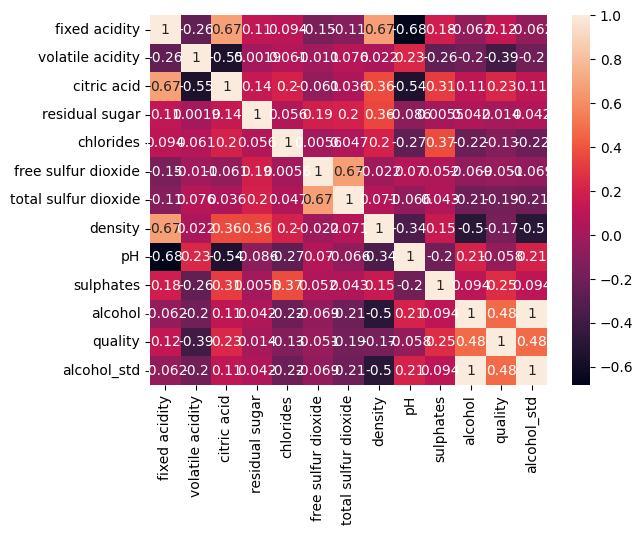

In [42]:

# Calcular la matriz de correlación
corr_matrix = df.corr()

# Visualizar la matriz de correlación
sns.heatmap(corr_matrix, annot=True)
plt.show()

Parte 2: Separa en entrenamiento y validación tu prueba 80-20.
Construye tu predicción de la regresión lineal simple sobre el
conjunto de entrenamiento

In [43]:

# Seleccionar las variables independientes y dependiente
X = df[['alcohol']]
y = df['quality']

# Dividir los datos en entrenamiento y prueba (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()


Parte 3: Realiza dos visualizaciones de la dispersión de datos y la
línea de ajuste tanto en el conjunto de entrenamiento como en
el de validación.

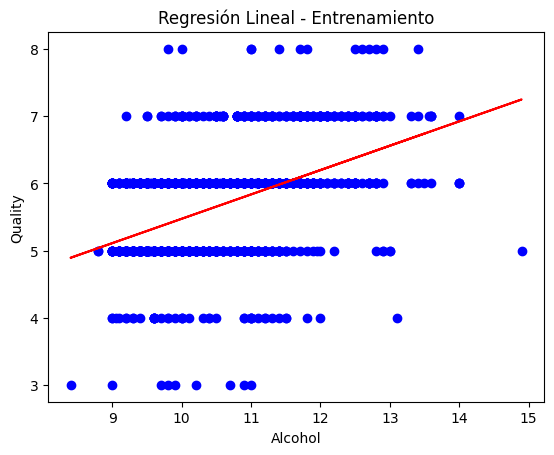

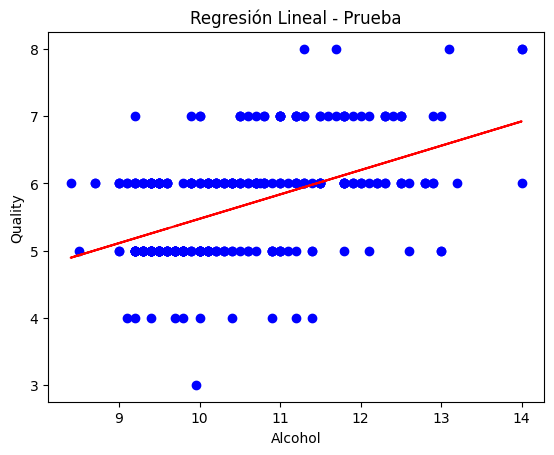

In [44]:
# Predicciones en el conjunto de entrenamiento
y_train_pred = model.predict(X_train)

# Predicciones en el conjunto de prueba
y_test_pred = model.predict(X_test)

# Visualización para el conjunto de entrenamiento
plt.scatter(X_train, y_train, color='blue')
plt.plot(X_train, y_train_pred, color='red')
plt.xlabel('Alcohol')
plt.ylabel('Quality')
plt.title('Regresión Lineal - Entrenamiento')
plt.show()

# Visualización para el conjunto de prueba
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_test_pred, color='red')
plt.xlabel('Alcohol')
plt.ylabel('Quality')
plt.title('Regresión Lineal - Prueba')
plt.show()

• Parte 4: ¿Cuáles son los valores de las betas de la ecuación que
describe la regresión lineal?

In [45]:
print("Coeficiente (beta):", model.coef_)
print("Intercepto:", model.intercept_)

Coeficiente (beta): [0.36231469]
Intercepto: 1.8492942045171596


Parte 5: Calcula las métricas de RMSE y la r-cuadrada tanto
para el training y test.

In [46]:

# RMSE y R^2 para el conjunto de entrenamiento
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_train = r2_score(y_train, y_train_pred)

# RMSE y R^2 para el conjunto de prueba
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_test = r2_score(y_test, y_test_pred)

print("RMSE entrenamiento:", rmse_train)
print("R^2 entrenamiento:", r2_train)
print("RMSE prueba:", rmse_test)
print("R^2 prueba:", r2_test)

RMSE entrenamiento: 0.7107990664889502
R^2 entrenamiento: 0.22342286653437893
RMSE prueba: 0.7067730428312582
R^2 prueba: 0.23561797203976986
